# Week 9 Tutorial: Visualising Data
In this tutorial we will visualise data to describe pedestrian and cyclist traffic in Brisbane. For simplicity, we have chosen to analyse one site (Maritime Museum, South Brisbane) which is close to QUT Garden's Point. 
<h3>Data Attribution</h3>
<table style="border-style:solid; margin-left:0">
        <tr><td>Contributor:</td><td>Brisbane City Council 2023</td></tr>
        <tr><td>License:</td><td><a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a></td></tr>
        <tr><td>Data source:</td><td><a href="https://www.data.brisbane.qld.gov.au/data/dataset/bikeway-counts/resource/90d62cbb-d923-4820-be27-febf42dae10d">https://www.data.brisbane.qld.gov.au/data/dataset/bikeway-counts/resource/90d62cbb-d923-4820-be27-febf42dae10d</a></td></tr>
        <tr><td>Local data file:</td><td><a href="bike-ped-auto-counts-2021.csv">bike-ped-auto-counts-2021.csv</a>  </td></tr>
        <tr><td colspan=2>If you share this data, you must preserve this attribution.</td></tr>
</table>      
<p>Make sure you have uploaded file <code>bike-ped-auto-counts-2021.csv</code> to the same folder as this Notebook.</p>

## Importing Data and Processing Data
The data has been imported and processed for you so you can focus your time on data visualisation. Don't change the code, but do read it as it contains some useful data processing tools.

In [1]:
import pandas as pd

# importing data
auto_counts = pd.read_csv('bike-ped-auto-counts-2021.csv', parse_dates = ['Date'], index_col = 'Date', usecols = ['Date', 'A025, Maritime Museum, South Brisbane  _Pedestrian', 'A025, Maritime Museum, South Brisbane  _Cyclist', 'A026, Annerley Rd, South Brisbane  _Cyclist'])

# changing column labels
auto_counts.rename(columns = {'A025, Maritime Museum, South Brisbane  _Pedestrian':'Pedestrians','A025, Maritime Museum, South Brisbane  _Cyclist':'Cyclists', 'A026, Annerley Rd, South Brisbane  _Cyclist': 'Cyclists_other_site'}, inplace=True)

auto_counts

,Pedestrians,Cyclists,Cyclists_other_site
Date,,,
2021-01-01,5710.0,1738.0,265
2021-01-02,6485.0,2538.0,462
2021-01-03,6525.0,2974.0,479
2021-01-04,4720.0,2865.0,538
2021-01-05,4690.0,3353.0,637
...,...,...,...
2021-12-27,4644.0,1970.0,351
2021-12-28,3073.0,910.0,224
2021-12-29,3875.0,1311.0,397


## Part 1: Comparing Pedestrian and Cyclist Counts
Compare the pedestrian and cyclist counts using the following visuals:
1. A density plot including both the pedestrian and cyclist counts
2. A histogram with 20 bins (use the bins argument). The plots should be on separate subplots (use the subplots argument)
3. A boxplot


Based on the plots, how to the counts compare? Do they have similar distributions? Is one count noticably larger than the other?

<Axes: ylabel='Density'>

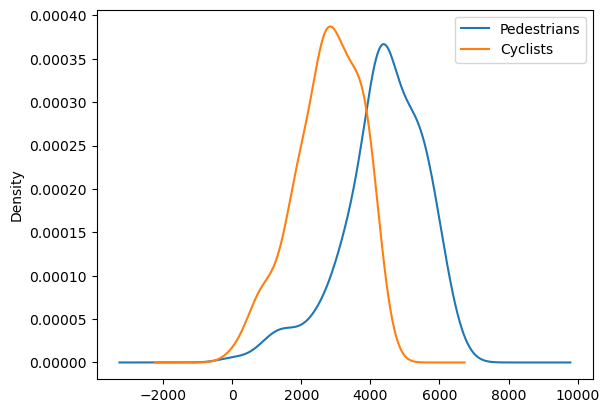

In [2]:
# insert density plot here
auto_counts.plot(y = ['Pedestrians', 'Cyclists'], kind = 'density')

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

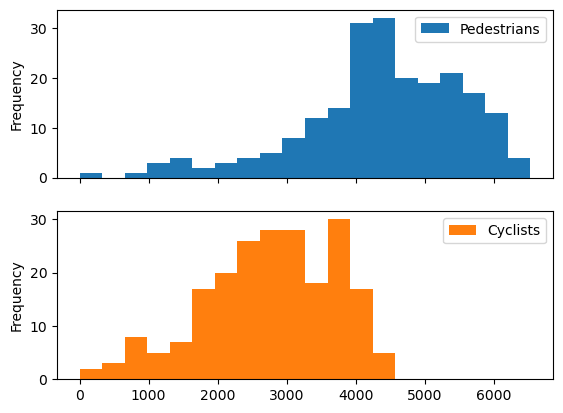

In [3]:
# insert histogram here
auto_counts.plot(y = ['Pedestrians', 'Cyclists'], kind = 'hist', bins = 20, subplots = True)

<Axes: >

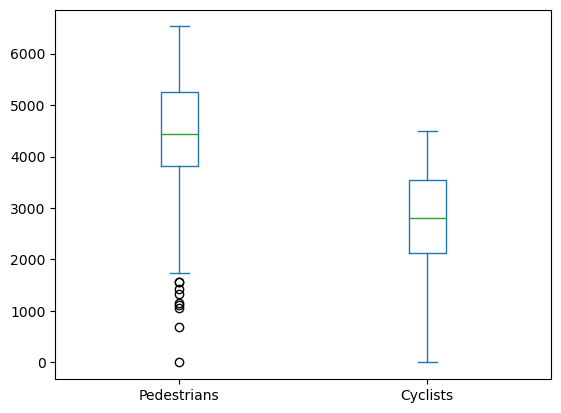

In [4]:
# insert box plot here
auto_counts.plot(y = ['Pedestrians', 'Cyclists'], kind = 'box')

## Part 2: Investigating Time Series Trends
Here we will explore how pedestrian and cyclist counts vary throughout the year. Line plots are a common way to explore time series data like this. Create a line plot showing how pedestrian and cyclist counts vary throughout the year. Ensure the plot has a title and appropriate labels. Is there a clear increase/decrease in traffic over time? Why are there gaps in the plot?

<Axes: xlabel='Date'>

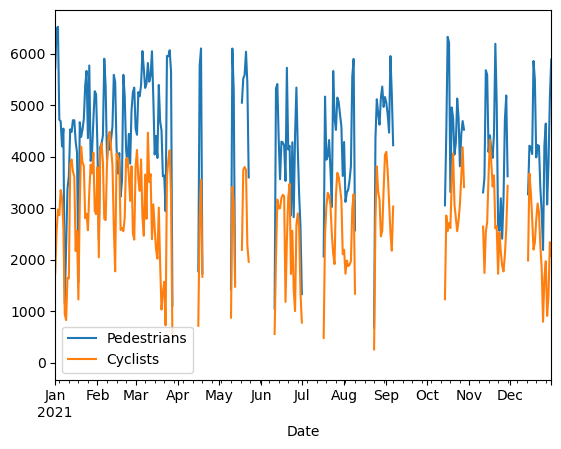

In [5]:
# insert line plot here
auto_counts.plot(y = ['Pedestrians','Cyclists'])

We notice that the plot might have a periodic nature due to day of the week being a factor in pedestrian and cyclist counts, but it's a bit hard to see while looking over the full year. This time, create a line plot that shows the pedestrian and cyclist counts just for the month of February (hint: you can do this with the xlim argument). Does day of the week look to have an effect on the counts?

<Axes: xlabel='Date'>

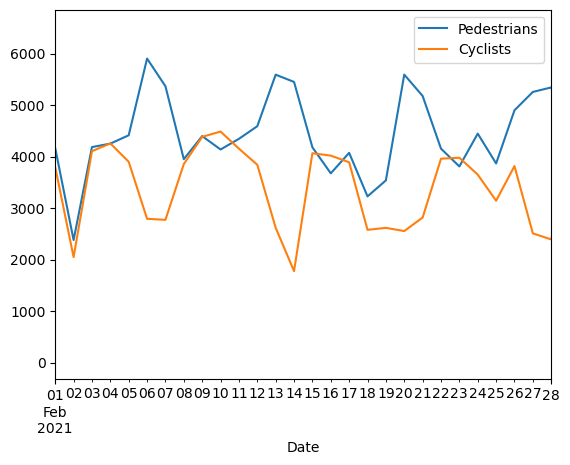

In [6]:
# insert line plot for February here
auto_counts.plot(y = ['Pedestrians','Cyclists'], xlim = ['2021-02-01','2021-02-28'])

To further investigate the effect of day of the week, we could create a new dataset which includes the average counts for each day of the week.

In [7]:
# Creating weekly count dataset. 
# Step 1: Use day_name method to create a new column containing the day of the week
auto_counts['Day'] = auto_counts.index.day_name()

# Step 2: Use the groupby method to groupby day and then apply a mean aggregate
auto_counts_by_day = auto_counts.groupby('Day').mean()

# In what order are the days displaying?
auto_counts_by_day

,Pedestrians,Cyclists,Cyclists_other_site
Day,,,
Friday,4175.741935,2747.258065,614.169811
Monday,3685.161290,2661.225806,600.980769
Saturday,5061.032258,2213.096774,444.250000
Sunday,5005.064516,2447.516129,454.365385
Thursday,4140.451613,2990.741935,658.653846
Tuesday,4214.689655,3047.103448,654.365385
Wednesday,4246.600000,3232.500000,660.769231


In [8]:
# To have the days displayed in order from Monday - Sunday, 
# we can convert the column from a string to a categorical and define the order of each category
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
auto_counts['Day'] = pd.Categorical(auto_counts['Day'], categories = days, ordered = True)
auto_counts_by_day = auto_counts.groupby('Day').mean()
auto_counts_by_day

,Pedestrians,Cyclists,Cyclists_other_site
Day,,,
Monday,3685.161290,2661.225806,600.980769
Tuesday,4214.689655,3047.103448,654.365385
Wednesday,4246.600000,3232.500000,660.769231
Thursday,4140.451613,2990.741935,658.653846
Friday,4175.741935,2747.258065,614.169811
Saturday,5061.032258,2213.096774,444.250000
Sunday,5005.064516,2447.516129,454.365385


Create a bar graph that shows how the average counts for pedestrians and cyclists are effected by day of the week. Does the day of the week have a significant effect on the counts? Are pedestrians and cyclists affected in the same way, or differently?

<Axes: xlabel='Day'>

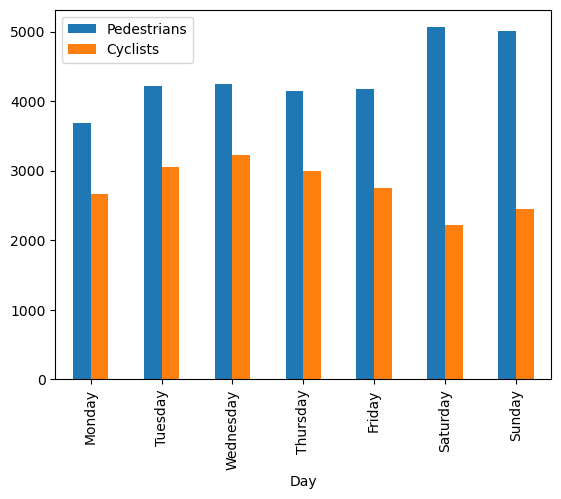

In [9]:
# insert bar plot here
auto_counts_by_day.plot(y = ['Pedestrians', 'Cyclists'], kind = 'bar')

## Part 3: Comparing Cyclist Counts at Two Sites
We noticed in part 2 that there we some missing values in the data (clearly the counter had some technical issues!). Another counter located nearby (Annerley Rd, South Brisbane) did not have any technical issues throughout the year. It is hypothesised that if there is a strong relationship between counts on the two sites, we could reasonably accurately fill in missing values.

Create a scatter plot that shows the relationship between:
1. Cyclists on other site vs. cyclists
2. Cyclists on other site vs. pedestrians

Also calculate the correlation between these values.

Based on the plots, could we reasonably predect cyclists and/or pedestrians at the Maritime Museum using data from the other site?

<Axes: xlabel='Cyclists_other_site', ylabel='Cyclists'>

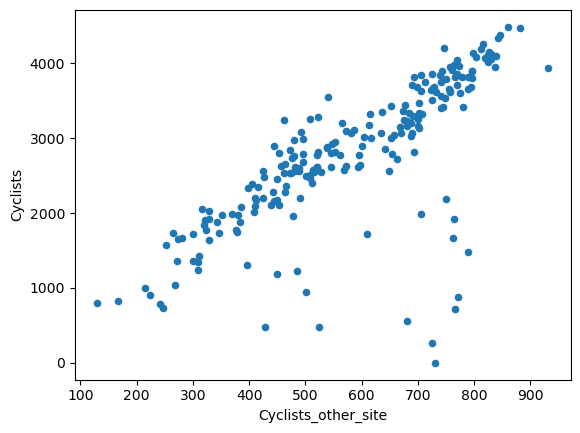

In [10]:
# insert scatter plot 1 here
auto_counts.plot(x = 'Cyclists_other_site', y = 'Cyclists', kind = 'scatter')

<Axes: xlabel='Cyclists_other_site', ylabel='Pedestrians'>

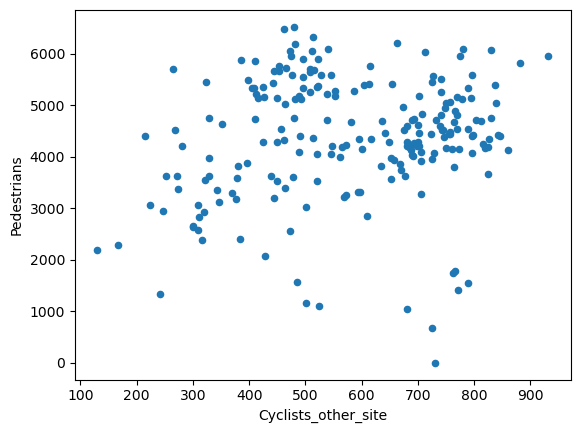

In [11]:
# insert scatter plot 2 here
auto_counts.plot(x = 'Cyclists_other_site', y = 'Pedestrians', kind = 'scatter')

In [12]:
# insert correlations here
corr_coeff = auto_counts.corr(numeric_only = True)
corr_coeff

,Pedestrians,Cyclists,Cyclists_other_site
Pedestrians,1.000000,0.555685,0.153256
Cyclists,0.555685,1.000000,0.736271
Cyclists_other_site,0.153256,0.736271,1.000000


**Challenge**

We see from the first scatter plot that there are some outliers below the general trendline. This could be because the sensor at Maritime Museum was broken for part of the day rather than the full day. The most likely scenario for this would be days immediately preceeding or following a day with missing data. Create a new filtered dataset which has these rows removed and plots then plot the relationship between cyclist counts at the two sites. Comment on whether this has removed the outliers or not.

,Pedestrians,Cyclists,Cyclists_other_site
Pedestrians,1.000000,0.372795,0.246938
Cyclists,0.372795,1.000000,0.914982
Cyclists_other_site,0.246938,0.914982,1.000000


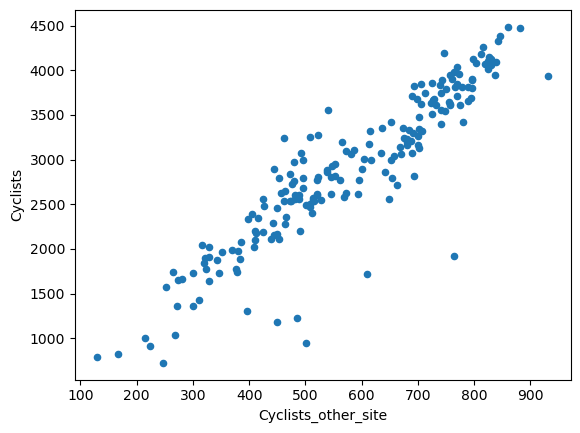

In [15]:
# insert code that filters the data to only keep rows that have data on the current day, the preceeding day, 
# and the next day. Redo the scatter plot using the filtered data. Hint: the isna() method can be used to detect 
# missing values

nan_rows = auto_counts.isna().any(axis=1)
filter_rows = []

if nan_rows[0] or nan_rows[1]:
    filter_rows.append(False)
else:
    filter_rows.append(True)

for index in range(1,364):
    if (nan_rows[index] or nan_rows[index - 1] or nan_rows[index + 1]):
       filter_rows.append(False)
    else:
        filter_rows.append(True)

if nan_rows[363] or nan_rows[364]:
    filter_rows.append(False)
else:
    filter_rows.append(True)        
        
filtered_auto_counts = auto_counts[filter_rows]
filtered_auto_counts.plot(x = 'Cyclists_other_site', y = 'Cyclists', kind = 'scatter')
filtered_auto_counts.corr(numeric_only = True)

## Part 4: Further Plot Customisation
Try accessing optional inputs of the pandas plot method to make the following customisations:
* change figure size
* change font size
* change line colour, line style, line width
* change xticks and yticks

You can even explore seaborn (an alternative library for data visualisation) if you are really keen.

## Part 5: Another Data Set
Have a look at the household electricity usage data ('D202.csv') from the last week's tutorial, and use data visualisation to answer questions about the data. 

Some example questions to help get you started are:
* How is electricity usage affected by hour of the day?
* How is electricity usage affected by day of the week?
* How is electricity usage affected by month of the year?
* Is there a strong linear relationship between electricity usage and cost?